In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('adult_dataset.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.replace('?', pd.NA, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Ensure that there are no negative values in columns where they shouldn't be
df = df[df['age'] >= 0]
df = df[df['fnlwgt'] >= 0]
df = df[df['capital-gain'] >= 0]
df = df[df['capital-loss'] >= 0]
df = df[df['hours-per-week'] >= 0]

Histograms
🔍 Objective:
To understand the distribution of a single continuous variable (e.g., age, hours-per-week). This helps identify skewness, central tendency, and spread.

Example:
Visualize how age is distributed among individuals in the dataset.

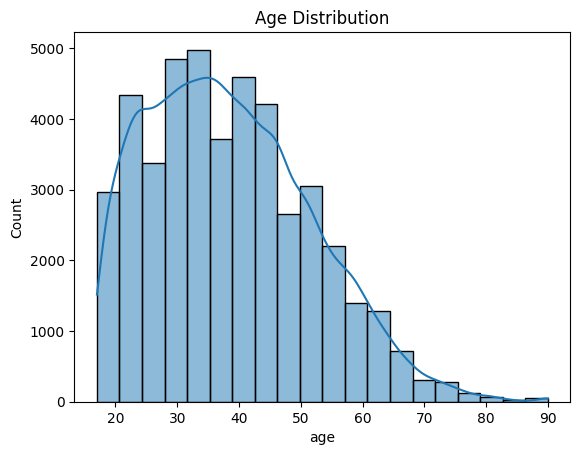

In [6]:
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


Dot Plot: educational-num by income
🔍 Objective:
Show the distribution of education levels (as numbers) across income categories (<=50K vs >50K). This helps you visually compare the education level of individuals earning above and below 50K.

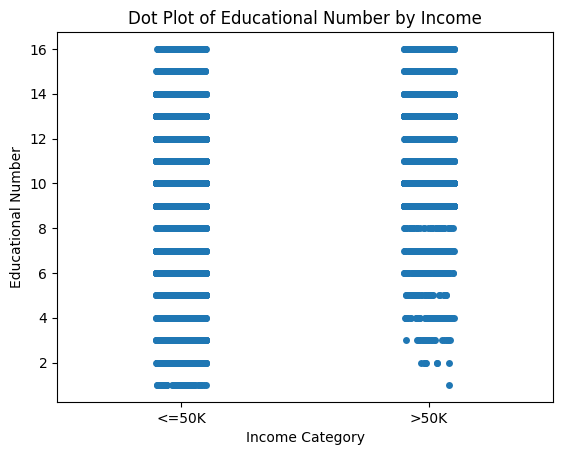

In [7]:
sns.stripplot(data=df, x='income', y='educational-num', jitter=True)
plt.title('Dot Plot of Educational Number by Income')
plt.xlabel('Income Category')
plt.ylabel('Educational Number')
plt.show()


Bar Plots
🔍 Objective:
To show the count or average of categories. Useful for comparing size/frequency of groups like workclass, income, etc.

Example:
Compare number of people in each workclass.

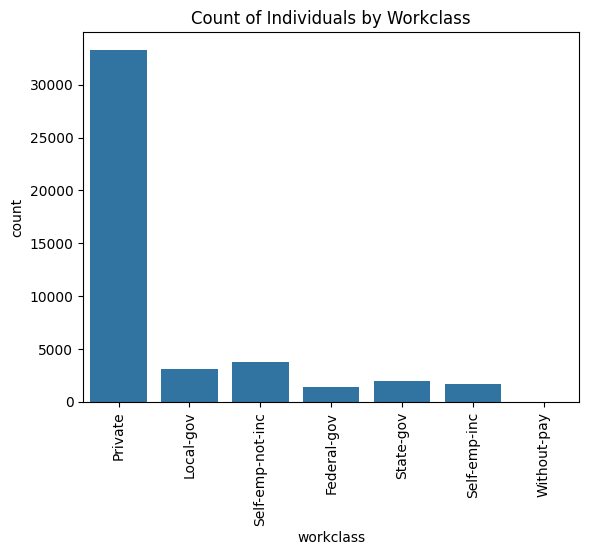

In [8]:
sns.countplot(data=df, x='workclass')
plt.xticks(rotation=90)
plt.title('Count of Individuals by Workclass')
plt.show()


Line Charts
🔍 Objective:
Best used for trends over time or ordered data. While this dataset isn't temporal, you could use it for trends like average hours-per-week over increasing age.

Example:
Visualize average hours worked vs. age.

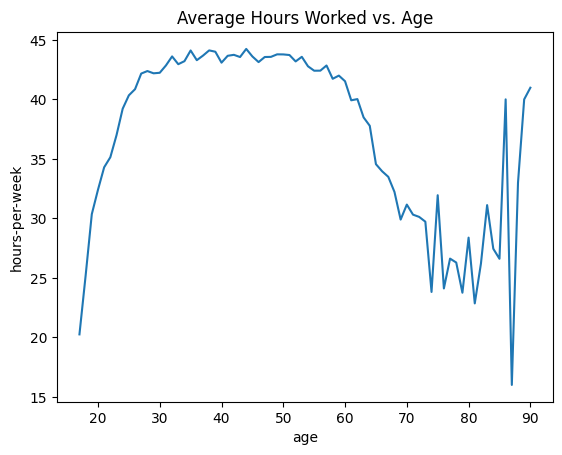

In [9]:
df_grouped = df.groupby('age')['hours-per-week'].mean().reset_index()
sns.lineplot(data=df_grouped, x='age', y='hours-per-week')
plt.title('Average Hours Worked vs. Age')
plt.show()


 Box Plot + Histogram + Scatter Plot Combo
🔍 Objective:
To combine distribution, outliers, and relationships in one view. The scatter plot shows correlation, histograms show distributions, and boxplots reveal outliers.

Example:
Visualize the relation between age and hours-per-week

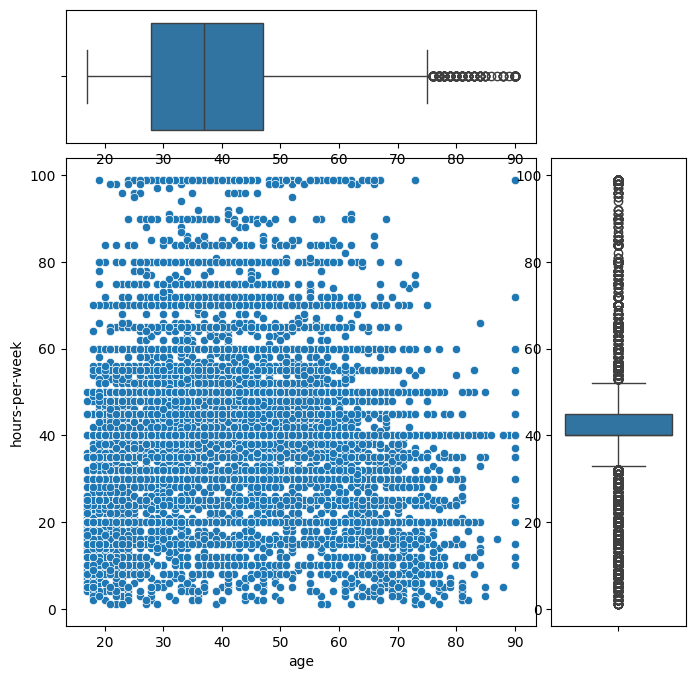

In [10]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[7, 2], height_ratios=[2, 7],
                       wspace=0.05, hspace=0.05)

ax_scatter = plt.subplot(gs[1, 0])
ax_histx = plt.subplot(gs[0, 0], sharex=ax_scatter)
ax_histy = plt.subplot(gs[1, 1], sharey=ax_scatter)

sns.scatterplot(x='age', y='hours-per-week', data=df, ax=ax_scatter)

sns.boxplot(x='age', data=df, ax=ax_histx, orient='h')
sns.boxplot(y='hours-per-week', data=df, ax=ax_histy, orient='v')

ax_histx.set(xlabel='')
ax_histy.set(ylabel='')

plt.show()
